In [5]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import pandas as pd

In [2]:
mu.update('nb_elastic_collocations')

Updated file `C:\Users\larsj\Documents\GitHub\dhlab_nb_api\nb_elastic_collocations.py`

In [20]:
def get_df_level(frases, title='*', coord = 'OR', media='aviser', period = (18000101, 20201231)):
    """Get dokument frequencies for phrases, coordinated with coord OR AND or +"""
    import requests
    coord = " " + coord + " "
    querystring = coord.join(['"' + frase + '"' for frase in frases])
    print(querystring)
    if media == 'bøker':
        agg_level = 'year'
    elif media == 'tidsskrift':
        agg_level = 'year, month'
    else:
        agg_level = 'year, month, day'
    query = {
        'q':querystring,
        'size':1,
        'aggs':agg_level,
        'filter':[
            'mediatype:{mt}'.format(mt=media),
            'title:{title}'.format(title=title),
            'date:[{date_from} TO {date_to}]'.format(date_from = period[0], date_to = period[1])
        ]
        
    }
    r = requests.get("https://api.nb.no/catalog/v1/aggregations", params = query)
    aggs = r.json() #['_embedded']['aggregations'][0]['buckets']
    #df = pd.DataFrame(aggs) #{x['key']:x['count'] for x in aggs}
    #df.columns = [querystring]
    return aggs

In [ ]:
def get_konks(urn, phrase, window=1000, n = 1000):
    import requests
    querystring = '"'+ phrase +'"' 
    query = {
        'q':querystring,
        'fragments': n,
        'fragSize':window
       
    }
    r = requests.get("https://api.nb.no/catalog/v1/items/{urn}/contentfragments".format(urn=urn), params = query)
    res = r.json()
    results = []
    try:
        for x in res['contentFragments']:
            urn = x['pageid']
            hit = x['text']
            splits = hit.split('<em>')
            s2 = splits[1].split('</em>')
            before = splits[0]
            word = s2[0]
            after = s2[1]b
            results.append({'urn': urn, 'before': before, 'word':word, 'after':after})
    except:
        True
    return results

In [23]:
import requests

In [28]:
def super_search(term = None, number=50, page=0, mediatype='aviser', period = (18000101, 20401231)):
    """Søk etter term og få ut json"""
    number = min(number, 50)
    r = requests.get(
        "https://api.nb.no:443/catalog/v1/items", 
         params = { 
             'q': term,
             'filter':[
                 'mediatype:{mediatype}'.format(mediatype=mediatype),
                 'date:[{date_from} TO {date_to}]'.format(date_from = period[0], date_to = period[1])
             ],
             'page':page, 
             'size':number
         }
    )
    return r.json()

In [37]:

def get_data(frase, media='aviser', title='jazznytt'):
    import requests
    query = {
        'q':'"'+frase+'""',
        'size':1,
        'aggs':'year',
        'filter':['mediatype:{mt}'.format(mt=media),'title:{title}'.format(title=title)]
    }
    r = requests.get("https://api.nb.no/catalog/v1/items", params = query)
    return r.json()

In [40]:
get_data('garbarek')

{'_links': {'self': {'href': 'https://api.nb.no/catalog/v1/items?q=%22garbarek%22%22&aggs=year&filter=mediatype:aviser&filter=title:jazznytt&page=0&size=1'}},
 'page': {'size': 1, 'totalElements': 0, 'totalPages': 0, 'number': 0},
 '_embedded': {'aggregations': [{'name': 'year'}]}}

In [43]:
a = requests.get("https://api.nb.no/catalog/v1/items?q=grandiosa&filter=mediatype%3Aaviser%20OR%20mediatype%3Abilder%20OR%20mediatype%3Ab%C3%B8ker%20OR%20mediatype%3Akart%20OR%20mediatype%3Amusikkmanuskripter%20OR%20mediatype%3Aprivatarkivmateriale%20OR%20mediatype%3Atidsskrift&filter=digital:Ja&aggs=mediatype&size=1&profile=wwwnbno", {
  "headers": {
    "accept": "*/*",
    "accept-language": "nb-NO,nb;q=0.9,en-US;q=0.8,en;q=0.7,no;q=0.6,nn;q=0.5",
    "cache-control": "no-cache",
    "pragma": "no-cache",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site"
  },
  "referrer": "https://www.nb.no/search?q=grandiosa&mediatype=aviser",
  "referrerPolicy": "no-referrer-when-downgrade",
  "method": "OPTIONS",
  "mode": "cors",
  "credentials": "omit"
});

In [47]:
b = requests.get("""
https://api.nb.no/catalog/v1/aggregations?q=grandiosa&filter=mediatype:b%C3%B8ker&filter=digital:Ja&filter=contentClasses%3Ajp2&aggs=mediatype&aggs=year%3A9999&aggs=literaryform&aggs=languages%3A9999&aggs=bibliography&aggs=ddc1&size=23&profile=wwwnbno
""")

In [48]:
b.json()

{'_links': {'self': {'href': 'https://api.nb.no/catalog/v1/aggregations?q=grandiosa&aggs=mediatype&aggs=year:9999&aggs=literaryform&aggs=languages:9999&aggs=bibliography&aggs=ddc1&filter=mediatype:b%C3%B8ker&filter=digital:Ja&filter=contentClasses:jp2&profile=wwwnbno%0A&page=0&size=1'}},
 'page': {'size': 0, 'totalElements': 1452, 'totalPages': 1, 'number': 0},
 '_embedded': {'aggregations': [{'name': 'ddc1',
    'buckets': [{'key': '8', 'count': 482},
     {'key': '3', 'count': 259},
     {'key': '6', 'count': 179},
     {'key': '7', 'count': 117},
     {'key': '9', 'count': 106},
     {'key': '0', 'count': 47},
     {'key': '4', 'count': 44},
     {'key': '1', 'count': 30},
     {'key': '2', 'count': 10},
     {'key': '5', 'count': 2}]},
   {'name': 'literaryform',
    'buckets': [{'key': 'Faglitteratur', 'count': 733},
     {'key': 'Skjønnlitteratur', 'count': 456},
     {'key': 'Uklassifisert', 'count': 263}]},
   {'name': 'bibliography',
    'buckets': [{'key': 'Norbok', 'count': 

In [55]:
import matplotlib.pyplot as plt


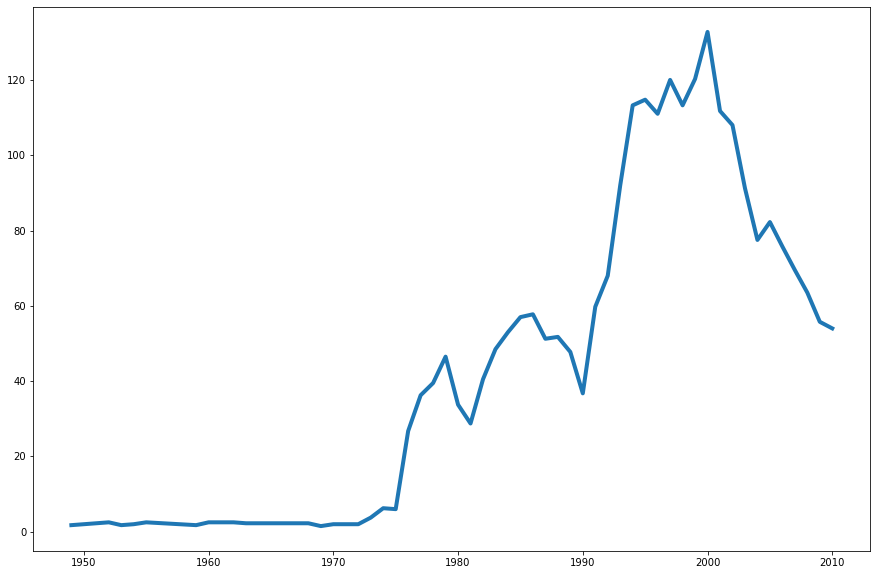

In [56]:
nb.unigram('kvinnehistorie', period=(1940, 2010)).rolling(window=4).mean().plot(legend=False, lw=4)
plt.savefig('kvinnehistorie.png', dpi = 300)

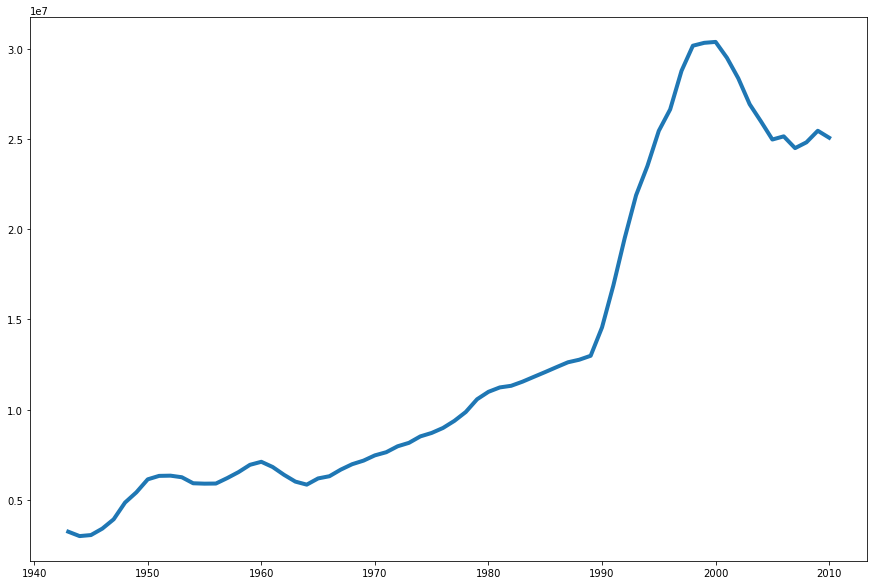

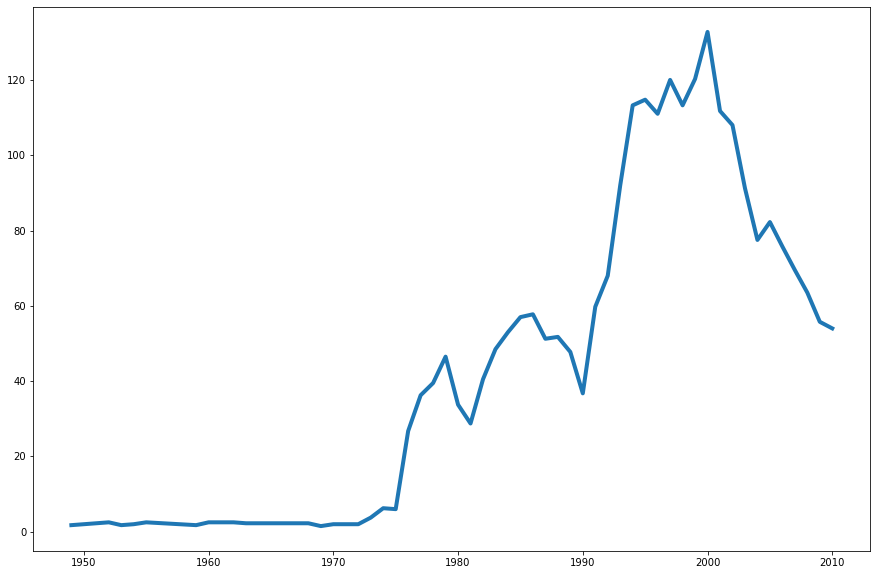

In [57]:
p = nb.unigram('.', period=(1940, 2010)).rolling(window=4).mean().plot(legend=False, lw=4)
k = nb.unigram('kvinnehistorie', period=(1940, 2010)).rolling(window=4).mean().plot(legend=False, lw=4)

In [74]:
plt.rcParams['font.size'] = 18

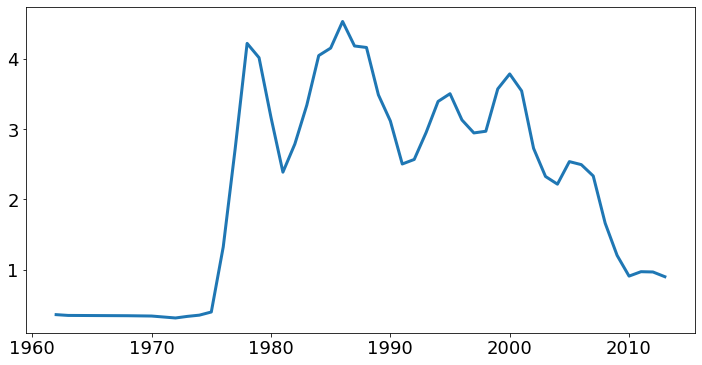

In [83]:
(nb.nb_ngram('kvinnehistorie', years=(1940, 2015), smooth=5)*100000).plot(lw=3, figsize=(12,6), legend=False)
plt.savefig('kvinnehistorie2.png', dpi = 300)

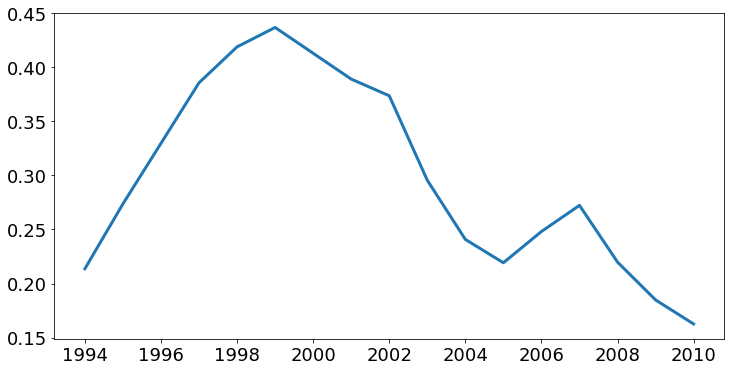

In [82]:
(nb.nb_ngram('kjønnshistorie', years=(1940, 2020), smooth=5)*100000).plot(lw=3, figsize=(12,6), legend=False)
plt.savefig('kvinnehistorie2.png', dpi = 300)

In [3]:
import nb_elastic_collocations as ncol

In [25]:
nb.sorted_wildcardsearch(
    {
        'word': 'a*t*', 
        'freq_lim': 50, 
        'limit': 50, 
        'factor': -1})

,a*t*
at,199527660
alt,14560681
att,4719899
art,1630533
akt,231929
amt,177868
ant,170414
act,167551
aat,149494
aut,108394


In [8]:
nb.wildcardsearch??

In [ ]:
ncol.get_all_konks()